In [1]:
from utils import plot

In [2]:
import xarray as xr
file_name='data/ERA5temp_1978_monthly.nc' 
ds=xr.open_dataset(file_name)
lat = ds['latitude']
lon = ds['longitude']


ds = ds.rename_dims({'latitude':'lat','longitude':'lon'})
ds.coords['lat'] = ('lat', lat.to_numpy())
ds.coords['lon'] = ('lon', lon.to_numpy()) # 对维度lon指定新的坐标信息lon
ds = ds.reset_coords(names=['latitude','longitude'], drop=True)
ds['t2m'] = ds['t2m'] - 273.15
ds['t2m']

<xarray.DataArray 't2m' (time: 12, lat: 721, lon: 1440)>
array([[[-30.659515, -30.659515, -30.659515, ..., -30.659515,
         -30.659515, -30.659515],
        [-30.748047, -30.748047, -30.748047, ..., -30.748047,
         -30.748047, -30.748047],
        [-30.836563, -30.836563, -30.836563, ..., -30.836563,
         -30.836563, -30.836563],
        ...,
        [-31.30986 , -31.30986 , -31.306458, ..., -31.31157 ,
         -31.31157 , -31.30986 ],
        [-31.503952, -31.503952, -31.503952, ..., -31.507355,
         -31.507355, -31.507355],
        [-31.820618, -31.820618, -31.820618, ..., -31.820618,
         -31.820618, -31.820618]],

       [[-30.250916, -30.250916, -30.250916, ..., -30.250916,
         -30.250916, -30.250916],
        [-30.174301, -30.174301, -30.175995, ..., -30.174301,
         -30.174301, -30.174301],
        [-30.090881, -30.090881, -30.092575, ..., -30.089172,
         -30.090881, -30.090881],
...
        [-36.669327, -36.671036, -36.671036, ..., -36.667633,
         -36.667633, -36.669327],
        [-36.582504, -36.582504, -36.582504, ..., -36.582504,
         -36.582504, -36.582504],
        [-36.635284, -36.635284, -36.635284, ..., -36.635284,
         -36.635284, -36.635284]],

       [[-27.458817, -27.458817, -27.458817, ..., -27.458817,
         -27.458817, -27.458817],
        [-27.404327, -27.404327, -27.404327, ..., -27.404327,
         -27.404327, -27.404327],
        [-27.29367 , -27.29367 , -27.29367 , ..., -27.29538 ,
         -27.29538 , -27.29538 ],
        ...,
        [-29.363907, -29.363907, -29.363907, ..., -29.365616,
         -29.363907, -29.363907],
        [-29.469467, -29.469467, -29.469467, ..., -29.47116 ,
         -29.47116 , -29.469467],
        [-29.695892, -29.695892, -29.695892, ..., -29.695892,
         -29.695892, -29.695892]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1978-01-01 1978-02-01 ... 1978-12-01
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8

In [16]:
type(np.array(ds['t2m'][0]))

numpy.ndarray

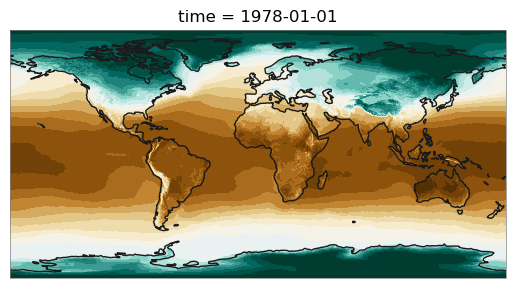

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
fig = plt.figure()
proj = ccrs.PlateCarree() #ccrs.Robinson()ccrs.Mollweide()Mollweide()
ax = fig.add_subplot(111, projection=proj)
levels = np.linspace(-30, 30, num=19)
plot.one_map_flat(ds['t2m'][0], ax, levels=levels, cmap="BrBG_r", mask_ocean=False, add_coastlines=True, add_land=False, plotfunc="pcolormesh")

In [16]:
#import rioxarray as xrx
#p = rxr.open_rasterio(filename)
p = np.mean(ds['t2m'], 0) > -20

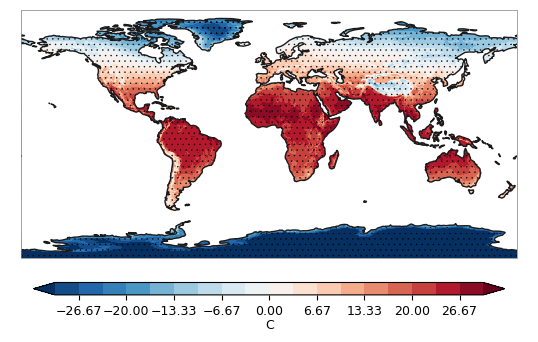

In [26]:
fig = plt.figure()  
proj = ccrs.PlateCarree()  #ccrs.Robinson()  
#proj = ccrs.Robinson()  
ax = fig.add_subplot(111, projection=proj)
levels = np.linspace(-30, 30, num=19)
plot.one_map(ds['t2m'], ax,  average='mean', dim='time', cmap="RdBu_r", levels=levels,  mask_ocean=True,  add_coastlines=True,  add_land=True,  plotfunc="pcolormesh", colorbar=True, getmean=True)
plot.hatch_map(ax, p, 3 * ".", label="Lack of model agreement", invert=True, linewidth=0.25, color="0.1")

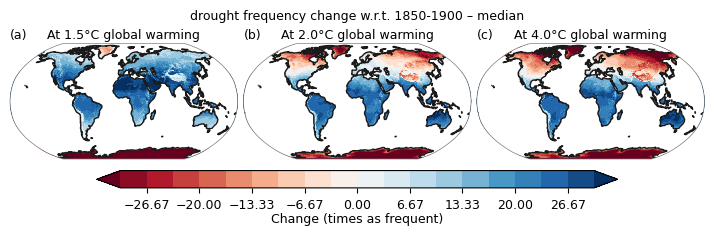

In [11]:
at_warming_c = []
at_warming_c.append(ds['t2m'][5:8])
at_warming_c.append(ds['t2m'][9:12])
at_warming_c.append(ds['t2m'][0:3])
len(at_warming_c)

#fig = plt.figure()   
#proj = ccrs.Robinson()  
#
#ax = fig.add_subplot(131, projection=proj)
plot.at_warming_level_one(at_warming_c=at_warming_c, unit="Change (times as frequent)", title='drought frequency change w.r.t. 1850-1900', \
                     average="median",  mask_ocean=True,  colorbar=True, cmap="RdBu",  dim='time', add_legend=False, hatch_data=None, levels=levels, plotfunc='pcolormesh', getmean=True)
